In [1]:
import base64
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [2]:
from db.client import PGClient

In [3]:
client = PGClient()

In [4]:
#q = client.query("select id, author, content from messages where author like 'claay%' or author like 'IzNoGoD%'" \
#                 "or author like 'Grey%'")
q = client.query("select id, author, content from messages")

train = q.fetchall()
train = pd.DataFrame(train, columns=['id','author','content'])


In [5]:
train.shape

(76018, 3)

In [6]:
def clean(c):
    url_pt = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    emoji_pt = '<:\w+:[0-9]+>'
    tag_pt = '<@!?[0-9]+>'
    c = str(c)
    c = re.sub(url_pt, '', c)
    c = re.sub(tag_pt, '', c)
    
    emojis = re.findall(emoji_pt,c)
    for e in emojis:
        e_new = e.split(':')[1].lower()
        #c = re.sub(e, ' XXX'+e_new+'XXX ', c)
        c = re.sub(e, '', c)
    
    
    return c.strip()

In [7]:
train['content'] = train['content'].apply(clean)
train = train[train['content'] !='']

In [8]:
train[train['content'].str.contains('chicken')]

,id,author,content
849,387028027038760960,IzNoGoD#8495,i got 2 chicken dinner while playing with storm
851,386981643677597713,kjx#4187,"We got chicken dinner while playing with Gery,..."
899,386952231515324417,IzNoGoD#8495,duos chicken dinner better than squad chicken ...
4504,384291824296263680,kjx#4187,got chicken dinner radek style yesterday
5049,383516085430910978,GreyPit#0750,no chicken dinner i suppose
5917,382860620988678167,kjx#4187,Go get chicken dinner with grgy
7623,381143114665951252,IzNoGoD#8495,got a duos chicken dinner while eating pizza
9977,379971999151423489,IzNoGoD#8495,"that says ""30 cows in a field, 20 ate chicken""..."
11539,379380008730230795,Xanxus#4308,to chicken dinner
11568,379369799119142926,IzNoGoD#8495,nah looks like you'll chicken out


In [9]:
data = [go.Bar(
            x = train.author.value_counts().index,
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [10]:
all_words = train['content'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [11]:
izno = train[train.author=='IzNoGoD#8495']['content'].values
grey = train[train.author=='GreyPit#0750']['content'].values
clay = train[train.author=='claay#4176']['content'].values

In [12]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

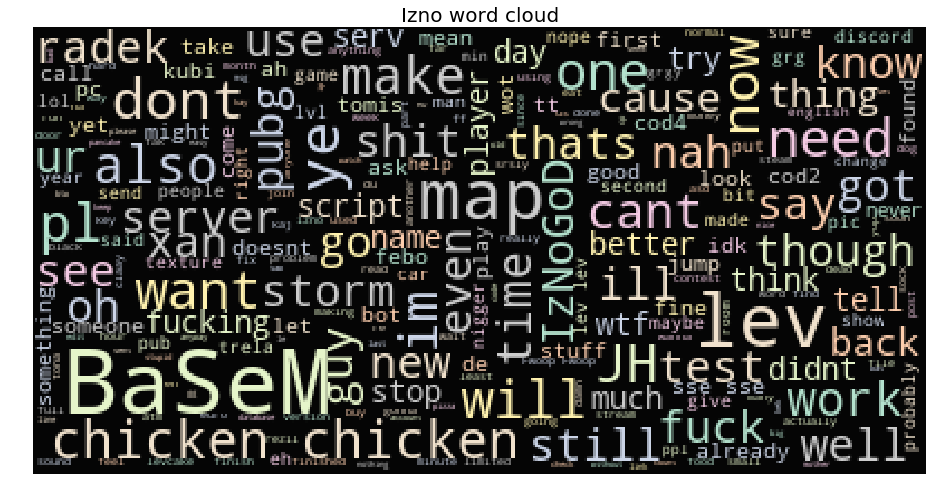

In [13]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(izno))
plt.title("Izno word cloud", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

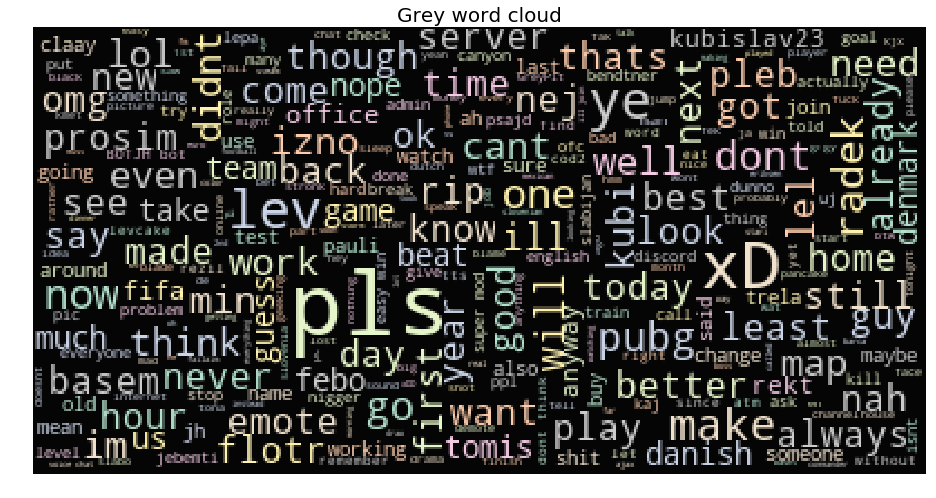

In [14]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(grey))
plt.title("Grey word cloud", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

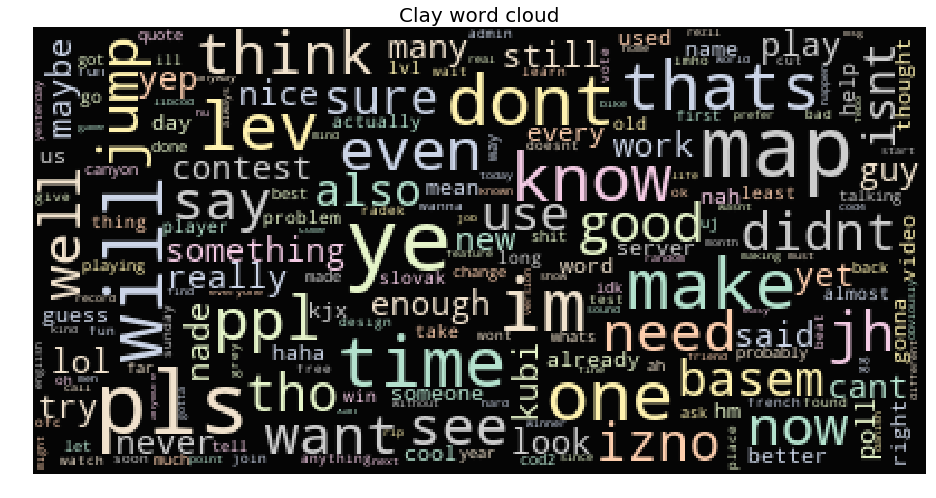

In [15]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(clay))
plt.title("Clay word cloud", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [16]:
import nltk

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/emzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/emzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/emzo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
first_text_list = nltk.word_tokenize(train.content.values[2])
print(first_text_list)

['pizza', 'called', 'anne', 'frank', '?']


In [19]:

stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

153

In [20]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['pizza', 'called', 'anne', 'frank', '?']
Length of original list: 5 words
Length of list after stopwords removal: 5 words


In [21]:
# stemmer = nltk.stem.PorterStemmer()
# print("The stemmed form of running is: {}".format(stemmer.stem("running")))
# print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
# print("The stemmed form of run is: {}".format(stemmer.stem("run")))

In [22]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize(":adds:")))

The lemmatized form of leaves is: :adds:


In [23]:
# Defining our sentence
sentence = ["I :love: to eat Burgers", 
            "I :love: to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['burgers', 'eat', 'fries', 'love', 'to']

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


In [24]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [25]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w.replace('xxx',':')) for w in analyzer(doc))

In [26]:
list(train.content.values)

['ah lol',
 'customer who thought he was funny and called himself anne frank',
 'pizza called anne frank?',
 'moving backend',
 'JH down for a few hours',
 'And which one?',
 'Pls dont use everyone tag for that',
 '@everyone Fortnite?',
 'kk',
 'k',
 'anyone pubg?',
 'idk and idc',
 'Butthurt michelle?',
 'very much DMCA to take anything down',
 'michelle shocked',
 'nah',
 'radek singing?',
 'pff time to listen to an artist thats not on spotify or youtube',
 'nose look like gardenhose',
 'What do u expect from a pop chart..',
 'jesus',
 "#5: big shaq-man's not hot",
 'donwlaoded UK top 40 of this week',
 'WTF',
 'jh bot online role',
 'slap',
 'slaps',
 'works fine for me',
 'doesnt work',
 'No reactions',
 'in reactions...',
 '🔫',
 'doge should be killed again 😄',
 '\\',
 'i whitelisted myself so i can use it 😛',
 'can you doge my post?',
 'JH ♥',
 ', Welcome to **JumpersHeaven**! Have a great time here :wink: !',
 '-.-',
 'yes',
 'my ears just died yes',
 'Wadu hek',
 'reinstall',
 

In [27]:
# Storing the entire training text in a list
text = list(train.content.values)
#text = ['&PogChamp&','&PogChamp&','adds','leaves','leaves','&PogChamp&','adds']
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [28]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [29]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [30]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:xd fuck radek nigger wtf right tell let friend hahah watch ll man storm home win playing working 100 picture big hahahah talking kill dog played stuff dick dead fek end didn yeah slabijan prolly point 14 card tonight yep

Topic #1:pls just im map izno did work actually mean ill sure people ok join eat whats okay word yesterday script told kappa bitch money far rezil fine son wouldnt live delete random room office 17 heard tomorrow seen died leave

Topic #2:lol thats tomis ur claay rigged english slap easy way sound buy grey fak speak uj hahaha real cause ve fr kmet kajax ty fifa 11 wrong dude password boy se hi finished language using soi thank ez different sex

Topic #3:gery trela ah flotr ball today sleep guess ya probably week hour kubislav23 nej 2017 30 read pm minute wont long called nope later yea 40 sse ffs 50 post drama face hu second rekt train demote house tiho door

Topic #4:lev yes time xan nice kjx kaj try doesnt doe iznogod black jumpershe

In [31]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

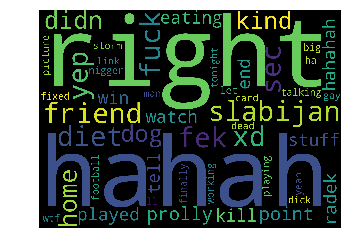

In [32]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

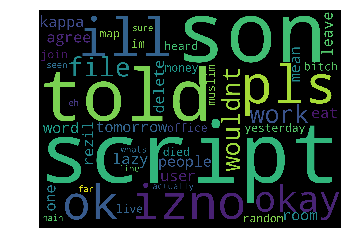

In [33]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()
